# Loading and Importing ACC Dataset

In [11]:
# Mount Goole-Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
# Loading Dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/Colab_Notebooks/yield_notyield/fig_1.0s/acc.zip')

# Unzip the file
zip_ref.extractall()
zip_ref.close()

# Becoming one with the data

In [13]:
# Walk through the direcory
import os
for (root,dir,file) in os.walk('acc', topdown=True):
  print(f'Path(root directory): {root}')
  print(f'Directries(folders) in {root}: {dir}')
  print(f'Number of files in {root}: {len(file)}\n')

Path(root directory): acc
Directries(folders) in acc: ['over_yield', 'not_yield']
Number of files in acc: 0

Path(root directory): acc/over_yield
Directries(folders) in acc/over_yield: []
Number of files in acc/over_yield: 202

Path(root directory): acc/not_yield
Directries(folders) in acc/not_yield: []
Number of files in acc/not_yield: 594



In [14]:
# Class Names
class_names = sorted(os.listdir('/content/acc'))
class_names

['not_yield', 'over_yield']

In [15]:
# Define a func to view random image from the Dataset
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_folder, target_class):

  '''View Random Image from the target class of the target folder'''
  
  random_image = random.sample(os.listdir(os.path.join(target_folder, target_class)), 1)
  target_image_path = os.path.join(target_folder, target_class, random_image[0])
  img = mpimg.imread(target_image_path)
  plt.imshow(img)
  print(f'Image Shape: {img.shape}')
  plt.title(target_class)
  plt.axis('off')

  return img

Image Shape: (480, 640, 4)


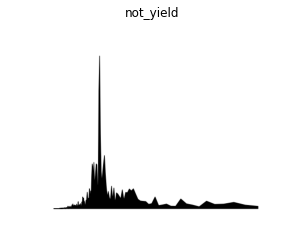

In [19]:
image = view_random_image('/content/acc', random.choice(os.listdir('/content/acc')))

# Splitt into Train and Test sets

In [20]:
import os
import numpy as np
import shutil

rootdir= '/content/acc' #path of the original folder
classes = ['not_yield', 'over_yield']

for i in classes:
  os.makedirs(rootdir +'/train/' + i)
  os.makedirs(rootdir +'/test/' + i)
  source = rootdir + '/' + i

  allFileNames = os.listdir(source)
  np.random.shuffle(allFileNames)
  test_ratio = 0.1
  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                        [int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

# Build an End-to-End CNN Model

In [21]:
# Building an end-to-end CNN model
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Data Preprocessing (normalizing/scaling, creating batches, setting up target image size etc.)
path = '/content/acc/train'
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_data = datagen.flow_from_directory(directory=path,
                                         batch_size=32,
                                         target_size=(224, 224),
                                         class_mode='binary',
                                         subset='training')
valid_data = datagen.flow_from_directory(directory=path,
                                         batch_size=32,
                                         target_size=(224, 224),
                                         class_mode='binary',
                                         subset='validation')

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))

Found 644 images belonging to 2 classes.
Found 71 images belonging to 2 classes.
Epoch 1/10
21/21 [==============================] - 17s 257ms/step - loss: 0.5493 - accuracy: 0.7484 - val_loss: 0.4123 - val_accuracy: 0.7465
Epoch 2/10
21/21 [==============================] - 5s 232ms/step - loss: 0.2960 - accuracy: 0.8866 - val_loss: 0.1618 - val_accuracy: 1.0000
Epoch 3/10
21/21 [==============================] - 5s 243ms/step - loss: 0.2007 - accuracy: 0.9193 - val_loss: 0.0922 - val_accuracy: 1.0000
Epoch 4/10
21/21 [==============================] - 5s 242ms/step - loss: 0.1583 - accuracy: 0.9581 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 5/10
21/21 [==============================] - 6s 240ms/step - loss: 0.1450 - accuracy: 0.9565 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 6/10
21/21 [==============================] - 5s 244ms/step - loss: 0.1403 - accuracy: 0.9612 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 5s 243ms/step 

In [22]:
# View Model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Evalauate the model

In [23]:
# Function for plotting Loss-Curve

## Define a function to plot the loss curves and accuracy curves seperately

def plot_training_curves(history):
  '''Plot training curves (Loss curve and Accuracy curve) Seperately'''
  # Losses
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  # Accuracies
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  # Epochs
  epochs = range(len(history.history['loss']))

  #Plot loss curve
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='Val_loss')
  plt.title('Loss Curve')
  plt.xlabel('epochs')
  plt.legend()

  # Plot the accuracy curve
  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='Val_accuracy')
  plt.title('accuracy Curve')
  plt.xlabel('epochs')
  plt.legend()

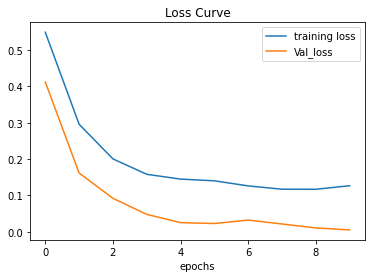

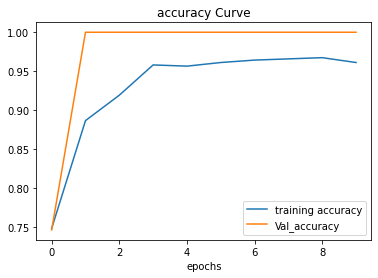

In [24]:
plot_training_curves(history_1)

In [31]:
# Evaluate on test Data
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = datagen.flow_from_directory(directory='/content/acc/test',
                                        batch_size=32,
                                        target_size=(224, 224),
                                        class_mode='binary')
model_1.evaluate(test_data)

Found 81 images belonging to 2 classes.
3/3 [==============================] - 1s 376ms/step - loss: 0.1782 - accuracy: 0.9506


[0.1781875491142273, 0.9506173133850098]

In [45]:
loss, accurcay = model_1.evaluate(test_data)
loss, accurcay

3/3 [==============================] - 1s 241ms/step - loss: 0.1782 - accuracy: 0.9506


(0.1781875491142273, 0.9506173133850098)

In [47]:
accurcay

0.9506173133850098

# Predictions on custom image

In [26]:
# Make predictions on Custom Images
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [27]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

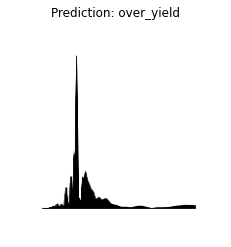

In [44]:
pred = pred_and_plot(model_1, '/content/acc/over_yield/121-wave4-fourier.png', class_names)

# Confusion Metrics　

In [33]:
y_prob = model_1.predict(test_data)
y_pred = tf.squeeze(tf.transpose(np.where(y_prob>0.5, 1, 0)))
y_pred

<tf.Tensor: shape=(81,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])>

In [56]:
y_pred2= tf.squeeze(tf.transpose(tf.round(y_prob)))
y_pred2.shape

TensorShape([81])

In [34]:
test_labels=[]
for i in range( test_data.__len__() ):
    test_labels.extend(test_data.__getitem__( i )[1])

test_labels = tf.convert_to_tensor(test_labels)
test_labels

<tf.Tensor: shape=(81,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [57]:
test_labels.shape

TensorShape([81])

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_pred2)

array([[48, 12],
       [16,  5]])

In [59]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred2, target_names=class_names))

              precision    recall  f1-score   support

   not_yield       0.75      0.80      0.77        60
  over_yield       0.29      0.24      0.26        21

    accuracy                           0.65        81
   macro avg       0.52      0.52      0.52        81
weighted avg       0.63      0.65      0.64        81



In [60]:
true_labels = test_data.classes
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_labels, y_pred2)

array([[44, 16],
       [20,  1]])